In [71]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [72]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [73]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [74]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [75]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [76]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [77]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [78]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [79]:
# View columns of Measurement class
measdata = session.query(Measurement).first()
measdata.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x25246b94820>,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [80]:
# View columns of Station class
statdata = session.query(Station).first()
statdata.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2524698d220>,
 'id': 1,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716}

# Exploratory Precipitation Analysis

In [81]:
# Find the most recent date in the data set.
#from sqlalchemy import asc, desc
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent


('2017-08-23')

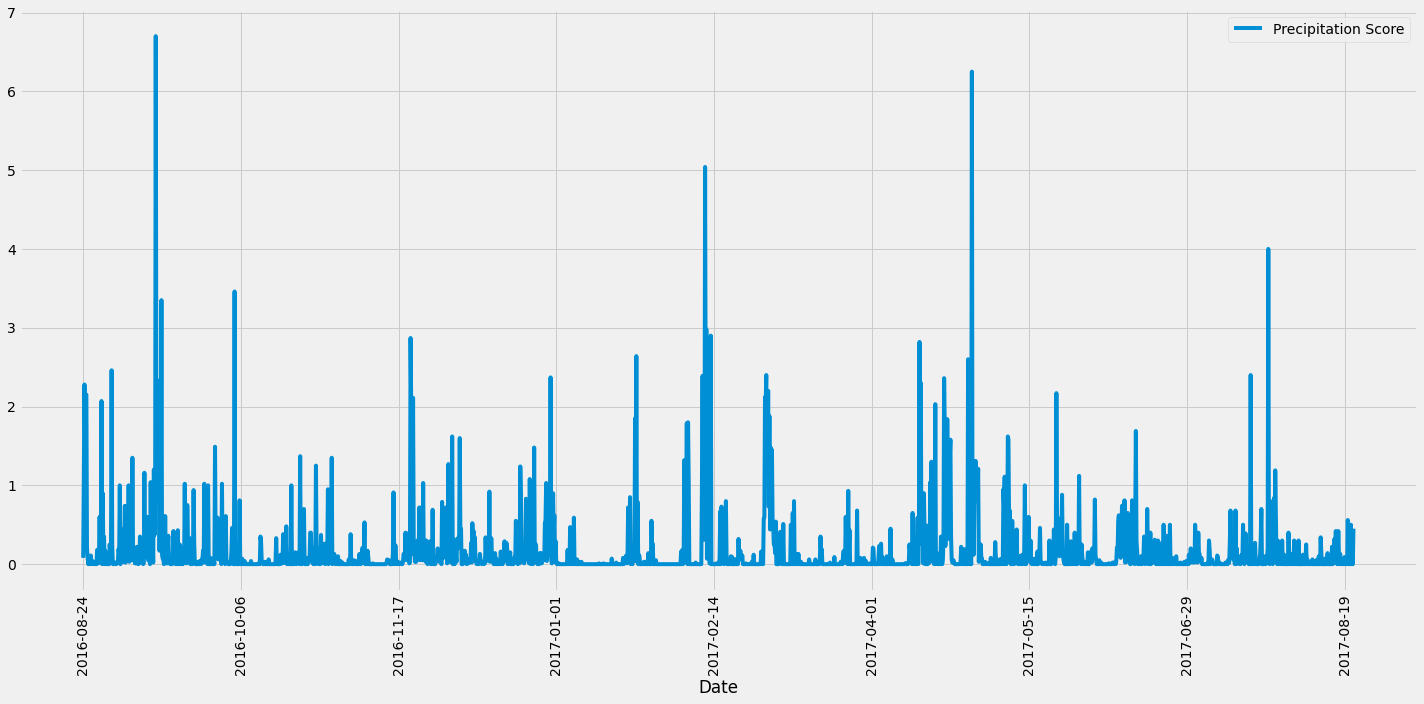

In [206]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
    #08-24-2016 through 08-23-2017

# Perform a query to retrieve the data and precipitation scores
twelvemos = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >'2016-08-23').\
    filter(Measurement.date <='2017-08-23')

    # view for correctness of query
# for line in twelvemos:
#     print(line)

# Save the query results as a Pandas DataFrame and set the index to the date column
dates = []
prcp = []
for line in twelvemos:
    if type(line[1]) == float:
        dates.append(line[0])
        prcp.append(line[1])

df = pd.DataFrame({"Date": dates, "Precipitation Score": prcp})
df = df.set_index("Date")


# Sort the dataframe by date
df = df.sort_index(ascending = True)
df
# Use Pandas Plotting with Matplotlib to plot the data
precplot = df.plot(kind = "line", figsize= (20,10), rot = 90)

plt.tight_layout()
plt.savefig('Images/precipitation.png')
plt.show()


In [125]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation Score
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [131]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [152]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
engine.execute(\
    'select Station.id, Measurement.station, count(Measurement.station)\
         from Station\
         join Measurement ON Measurement.station = Station.station\
         group by Measurement.station\
         order by count(Measurement.station) desc'\
              ).fetchall()


[(7, 'USC00519281', 2772),
 (1, 'USC00519397', 2724),
 (2, 'USC00513117', 2709),
 (6, 'USC00519523', 2669),
 (9, 'USC00516128', 2612),
 (3, 'USC00514830', 2202),
 (8, 'USC00511918', 1979),
 (4, 'USC00517948', 1372),
 (5, 'USC00518838', 511)]

In [203]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
from sqlalchemy import func

low = session.query(func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281").one()
high = session.query(func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281").one()
avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").one()

print(f'The lowest temperature at station USC00519281 is {low[0]}.')
print(f'The highest temperature at station USC00519281 is {high[0]}.')
print(f'The average temperature at station USC00519281 is {round(avg[0],2)}.')

The lowest temperature at station USC00519281 is 54.0.
The highest temperature at station USC00519281 is 85.0.
The average temperature at station USC00519281 is 71.66.


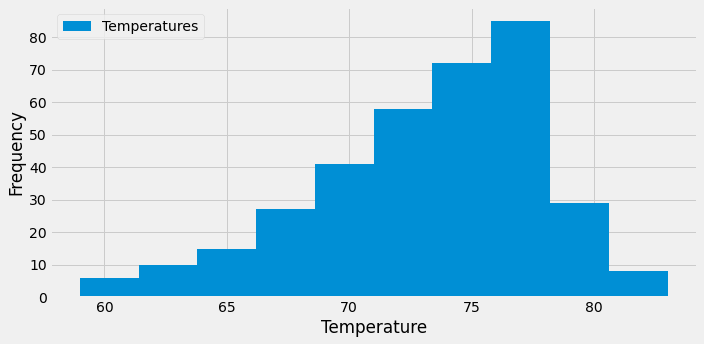

In [207]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelvemosactive = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >'2016-08-23').\
    filter(Measurement.date <='2017-08-23').\
    filter(Measurement.station == "USC00519281")

dates = []
tobs = []
for line in twelvemosactive:
    if type(line[1]) == float:
        dates.append(line[0])
        tobs.append(line[1])

df = pd.DataFrame({"Date": dates, "Temperatures": tobs})
df = df.set_index("Date")


# Sort the dataframe by date
df = df.sort_index(ascending = True)
df
# Use Pandas Plotting with Matplotlib to plot the data
precplot = df.plot(kind = "hist", figsize= (10,5))
precplot.set_xlabel("Temperature")

plt.tight_layout()
plt.savefig('Images/active.png')
plt.show()


# Close session

In [205]:
# Close Session
session.close()